<a href="https://colab.research.google.com/github/dsuwala/cmpp/blob/main/cmpp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor

#problem 1
Eigenvalues of random matrices from Gaussian Orthogonal Ensemble (GOE) which
is characterized by only real-valued squared matrices

In [ ]:
def wigner_goe(E : float, N : int):

    R = np.sqrt(2 * N)

    return (2 / (np.pi * R**2)) * np.sqrt(R**2 - E**2)

In [ ]:
parameters = [(6, 20000), (20, 10000), (200, 500)]

<ipython-input-35-0572f33ab01b>:5: RuntimeWarning: invalid value encountered in sqrt
  return (2 / (np.pi * R**2)) * np.sqrt(R**2 - E**2)


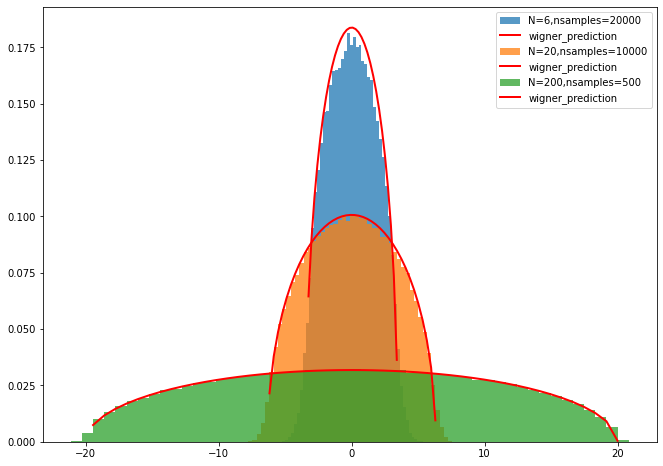

In [ ]:
plt.figure(figsize=(11,8))
for experiment in parameters:
    
    N = experiment[0]
    nsamples = experiment[1]

    matrices = []
    eigenvalues = []
    
    for n in range(0, nsamples):
        mtx = np.random.randn(N, N)
        mtx = (mtx + mtx.T) / 2
        matrices.append(mtx)
        eigenvalues.append(np.linalg.eigvals(mtx))
    
    n, bins, _ = plt.hist(np.array(eigenvalues).flatten(), 50, density=True, alpha=0.75, label=f"N={N},nsamples={nsamples}")
    plt.plot(bins, wigner_goe(bins, N), '-r', linewidth=2, label="wigner_prediction")
    plt.legend()
    # plt.title(f"N = {N}, nsamples = {nsamples}")

# Problem 2


In [ ]:
def wigner_goe(s):
    return ( np.pi/2. ) * s * np.exp(- (np.pi / 4.0) * s**2)

def wigner_gue(s):
    return ( 32. / (np.pi**2) ) * s**2 * np.exp(- (4 / np.pi) * s**2)

In [ ]:
N = 200 
nsamples = 200

diff_eig_goe = []
diff_eig_gue = []

for n in range(0, nsamples):
    mtx_goe = np.random.randn(N, N)
    mtx_gue = np.random.randn(N, N) + 1j * np.random.randn(N, N) 

    mtx_goe = (mtx_goe + mtx_goe.T) / 2
    mtx_gue = (mtx_gue + np.conjugate(mtx_gue).T) / 2

    eig_goe = np.sort(np.linalg.eigvals(mtx_goe))
    eig_gue = np.sort(np.real(np.linalg.eigvals(mtx_gue)))

    diff_eig_goe.append( np.diff(eig_goe[floor(N/2) - floor(N/4):floor(N/2) + floor(N/4)]) )
    diff_eig_gue.append( np.diff(eig_gue[floor(N/2) - floor(N/4):floor(N/2) + floor(N/4)]) )

    # print(diff_eig_goe)

diff_eig_goe = np.array(diff_eig_goe).flatten()
diff_eig_gue = np.array(diff_eig_gue).flatten()

diff_eig_goe /= np.average(diff_eig_goe)
diff_eig_gue /= np.average(diff_eig_gue)

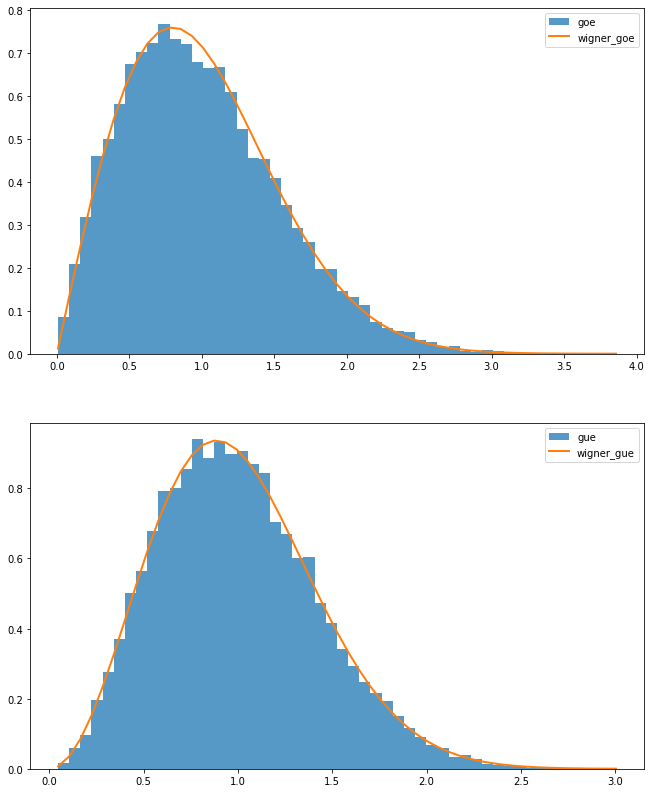

In [ ]:
plt.figure(figsize=(11, 14))

plt.subplot(2, 1, 1)
ngoe, bins_goe, _ = plt.hist(diff_eig_goe, 50, density=True, alpha=0.75, label=f"goe")
plt.plot(bins_goe, wigner_goe(bins_goe), linewidth=2, label="wigner_goe")
plt.legend()


plt.subplot(2, 1, 2)
ngue, bins_gue, _ = plt.hist(diff_eig_gue, 50, density=True, alpha=0.75, label=f"gue")
plt.plot(bins_gue, wigner_gue(bins_gue), linewidth=2, label="wigner_gue")
plt.legend()